In [59]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2  
import pandas as pd
import tensorflow as tf                
from tqdm import tqdm

In [60]:
class_names = ['cat', 'dog']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [61]:
print(class_names_label)

{'cat': 0, 'dog': 1}


In [62]:
cat="D:\Masters\Artificial Intelligent\Projects\cats"
dog="D:\Masters\Artificial Intelligent\Projects\dogs"

In [63]:
X_cat = [cv2.resize(cv2.imread(i),IMAGE_SIZE) for i in [os.path.join(cat,i) for i in os.listdir(cat)]]
X_dog = [cv2.resize(cv2.imread(i),IMAGE_SIZE) for i in [os.path.join(dog,i) for i in os.listdir(dog)]]
y_cat = len(X_cat) * ['cat']
y_dog = len(X_dog) * ['dog']

In [64]:
X_cat.extend(X_dog)
y_cat.extend(y_dog)

In [65]:
X = np.array(X_cat)
y = np.array(y_cat)

In [66]:
print(y)

['cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat'
 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat' 'dog' 'dog'
 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog'
 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog'
 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog'
 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog'
 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog'
 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog']


In [67]:
y = pd.get_dummies(y.tolist()).values

In [68]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
train_images, test_images, train_labels, test_labels = train_test_split(X,y,test_size=0.2)

In [71]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((112, 150, 150, 3), (112, 2), (28, 150, 150, 3), (28, 2))

In [72]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [73]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [74]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=100, validation_split = 0.2)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.7002 - accuracy: 0.4831 - val_loss: 5.9000 - val_accuracy: 0.5217
Epoch 2/100
1/1 [==============================] - 1s 591ms/step - loss: 5.8671 - accuracy: 0.5056 - val_loss: 1.7252 - val_accuracy: 0.4783
Epoch 3/100
1/1 [==============================] - 1s 561ms/step - loss: 1.5373 - accuracy: 0.4944 - val_loss: 1.1518 - val_accuracy: 0.4783
Epoch 4/100
1/1 [==============================] - 1s 583ms/step - loss: 1.0185 - accuracy: 0.4944 - val_loss: 0.6467 - val_accuracy: 0.6957
Epoch 5/100
1/1 [==============================] - 1s 581ms/step - loss: 0.6092 - accuracy: 0.6517 - val_loss: 0.7635 - val_accuracy: 0.5217
Epoch 6/100
1/1 [==============================] - 1s 552ms/step - loss: 0.7295 - accuracy: 0.5281 - val_loss: 0.7605 - val_accuracy: 0.5217
Epoch 7/100
1/1 [==============================] - 1s 567ms/step - loss: 0.7008 - accuracy: 0.5056 - val_loss: 0.6975 - val_accuracy: 0.5217
Epoch 8/100
1/1 

In [75]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

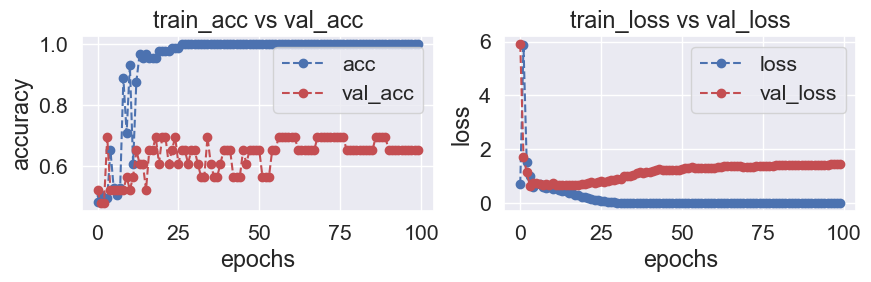

In [76]:
plot_accuracy_loss(history)

In [77]:
test_loss = model.evaluate(test_images, test_labels)

1/1 [==============================] - 0s 49ms/step - loss: 2.7007 - accuracy: 0.5000


In [78]:
predictions = model.predict(test_images)

1/1 [==============================] - 0s 87ms/step


In [79]:
pred_labels = np.argmax(predictions, axis = 1)

In [80]:
def display_random_image(class_names, images, labels): 
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

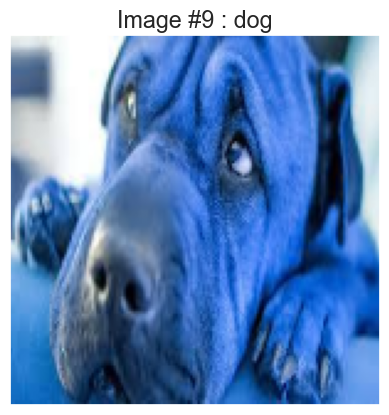

In [94]:
display_random_image(class_names, test_images, pred_labels)